In [9]:
import pandas as pd
import numpy as np

# Read the data
df1 = pd.read_csv('data/a3.data.gz', compression='gzip',sep = ' ', header=None)
df2 = pd.read_csv('data/aggregation.data.gz', compression='gzip',sep = ' ', header=None)
df3 = pd.read_csv('data/compound.data.gz', compression='gzip',sep = ' ', header=None)
df4 = pd.read_csv('data/d31.data.gz', compression='gzip',sep = ' ', header=None)
df5 = pd.read_csv('data/flame.data.gz', compression='gzip',sep = ' ', header=None)
df6 = pd.read_csv('data/pathbased.data.gz', compression='gzip',sep = ' ', header=None)
df7 = pd.read_csv('data/s4.data.gz', compression='gzip',sep = ' ', header=None)
df8 = pd.read_csv('data/unbalance.data.gz', compression='gzip',sep = ' ', header=None)

In [16]:
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

# List of data sets
data_sets = [df1, df2, df3, df4, df5, df6, df7, df8]

# Loop over each data set
for i, data_set in enumerate(data_sets):
    # Split the data into features and labels
    X = data_set.iloc[:, :-1]
    y = data_set.iloc[:, -1]

    # Define the outlier detection models
    ocsvm = OneClassSVM()
    lof = LocalOutlierFactor()
    iso = IsolationForest()

    # Fit the models to the data and predict outliers
    y_ocsvm = ocsvm.fit_predict(X)
    y_lof = lof.fit_predict(X)
    y_iso = iso.fit_predict(X)

    # Print the results
    print(f"Results for data set {i+1}:")
    print(f"One-Class SVM: {sum(y_ocsvm == -1)} outliers detected")
    print(f"Local Outlier Factor: {sum(y_lof == -1)} outliers detected")
    print(f"Isolation Forest: {sum(y_iso == -1)} outliers detected")
    print("")


Results for data set 1:
One-Class SVM: 3749 outliers detected
Local Outlier Factor: 22 outliers detected
Isolation Forest: 3517 outliers detected

Results for data set 2:
One-Class SVM: 392 outliers detected
Local Outlier Factor: 13 outliers detected
Isolation Forest: 359 outliers detected

Results for data set 3:
One-Class SVM: 197 outliers detected
Local Outlier Factor: 22 outliers detected
Isolation Forest: 108 outliers detected

Results for data set 4:
One-Class SVM: 1551 outliers detected
Local Outlier Factor: 11 outliers detected
Isolation Forest: 1658 outliers detected

Results for data set 5:
One-Class SVM: 118 outliers detected
Local Outlier Factor: 0 outliers detected
Isolation Forest: 81 outliers detected

Results for data set 6:
One-Class SVM: 151 outliers detected
Local Outlier Factor: 3 outliers detected
Isolation Forest: 118 outliers detected

Results for data set 7:
One-Class SVM: 2500 outliers detected
Local Outlier Factor: 9 outliers detected
Isolation Forest: 1415 ou

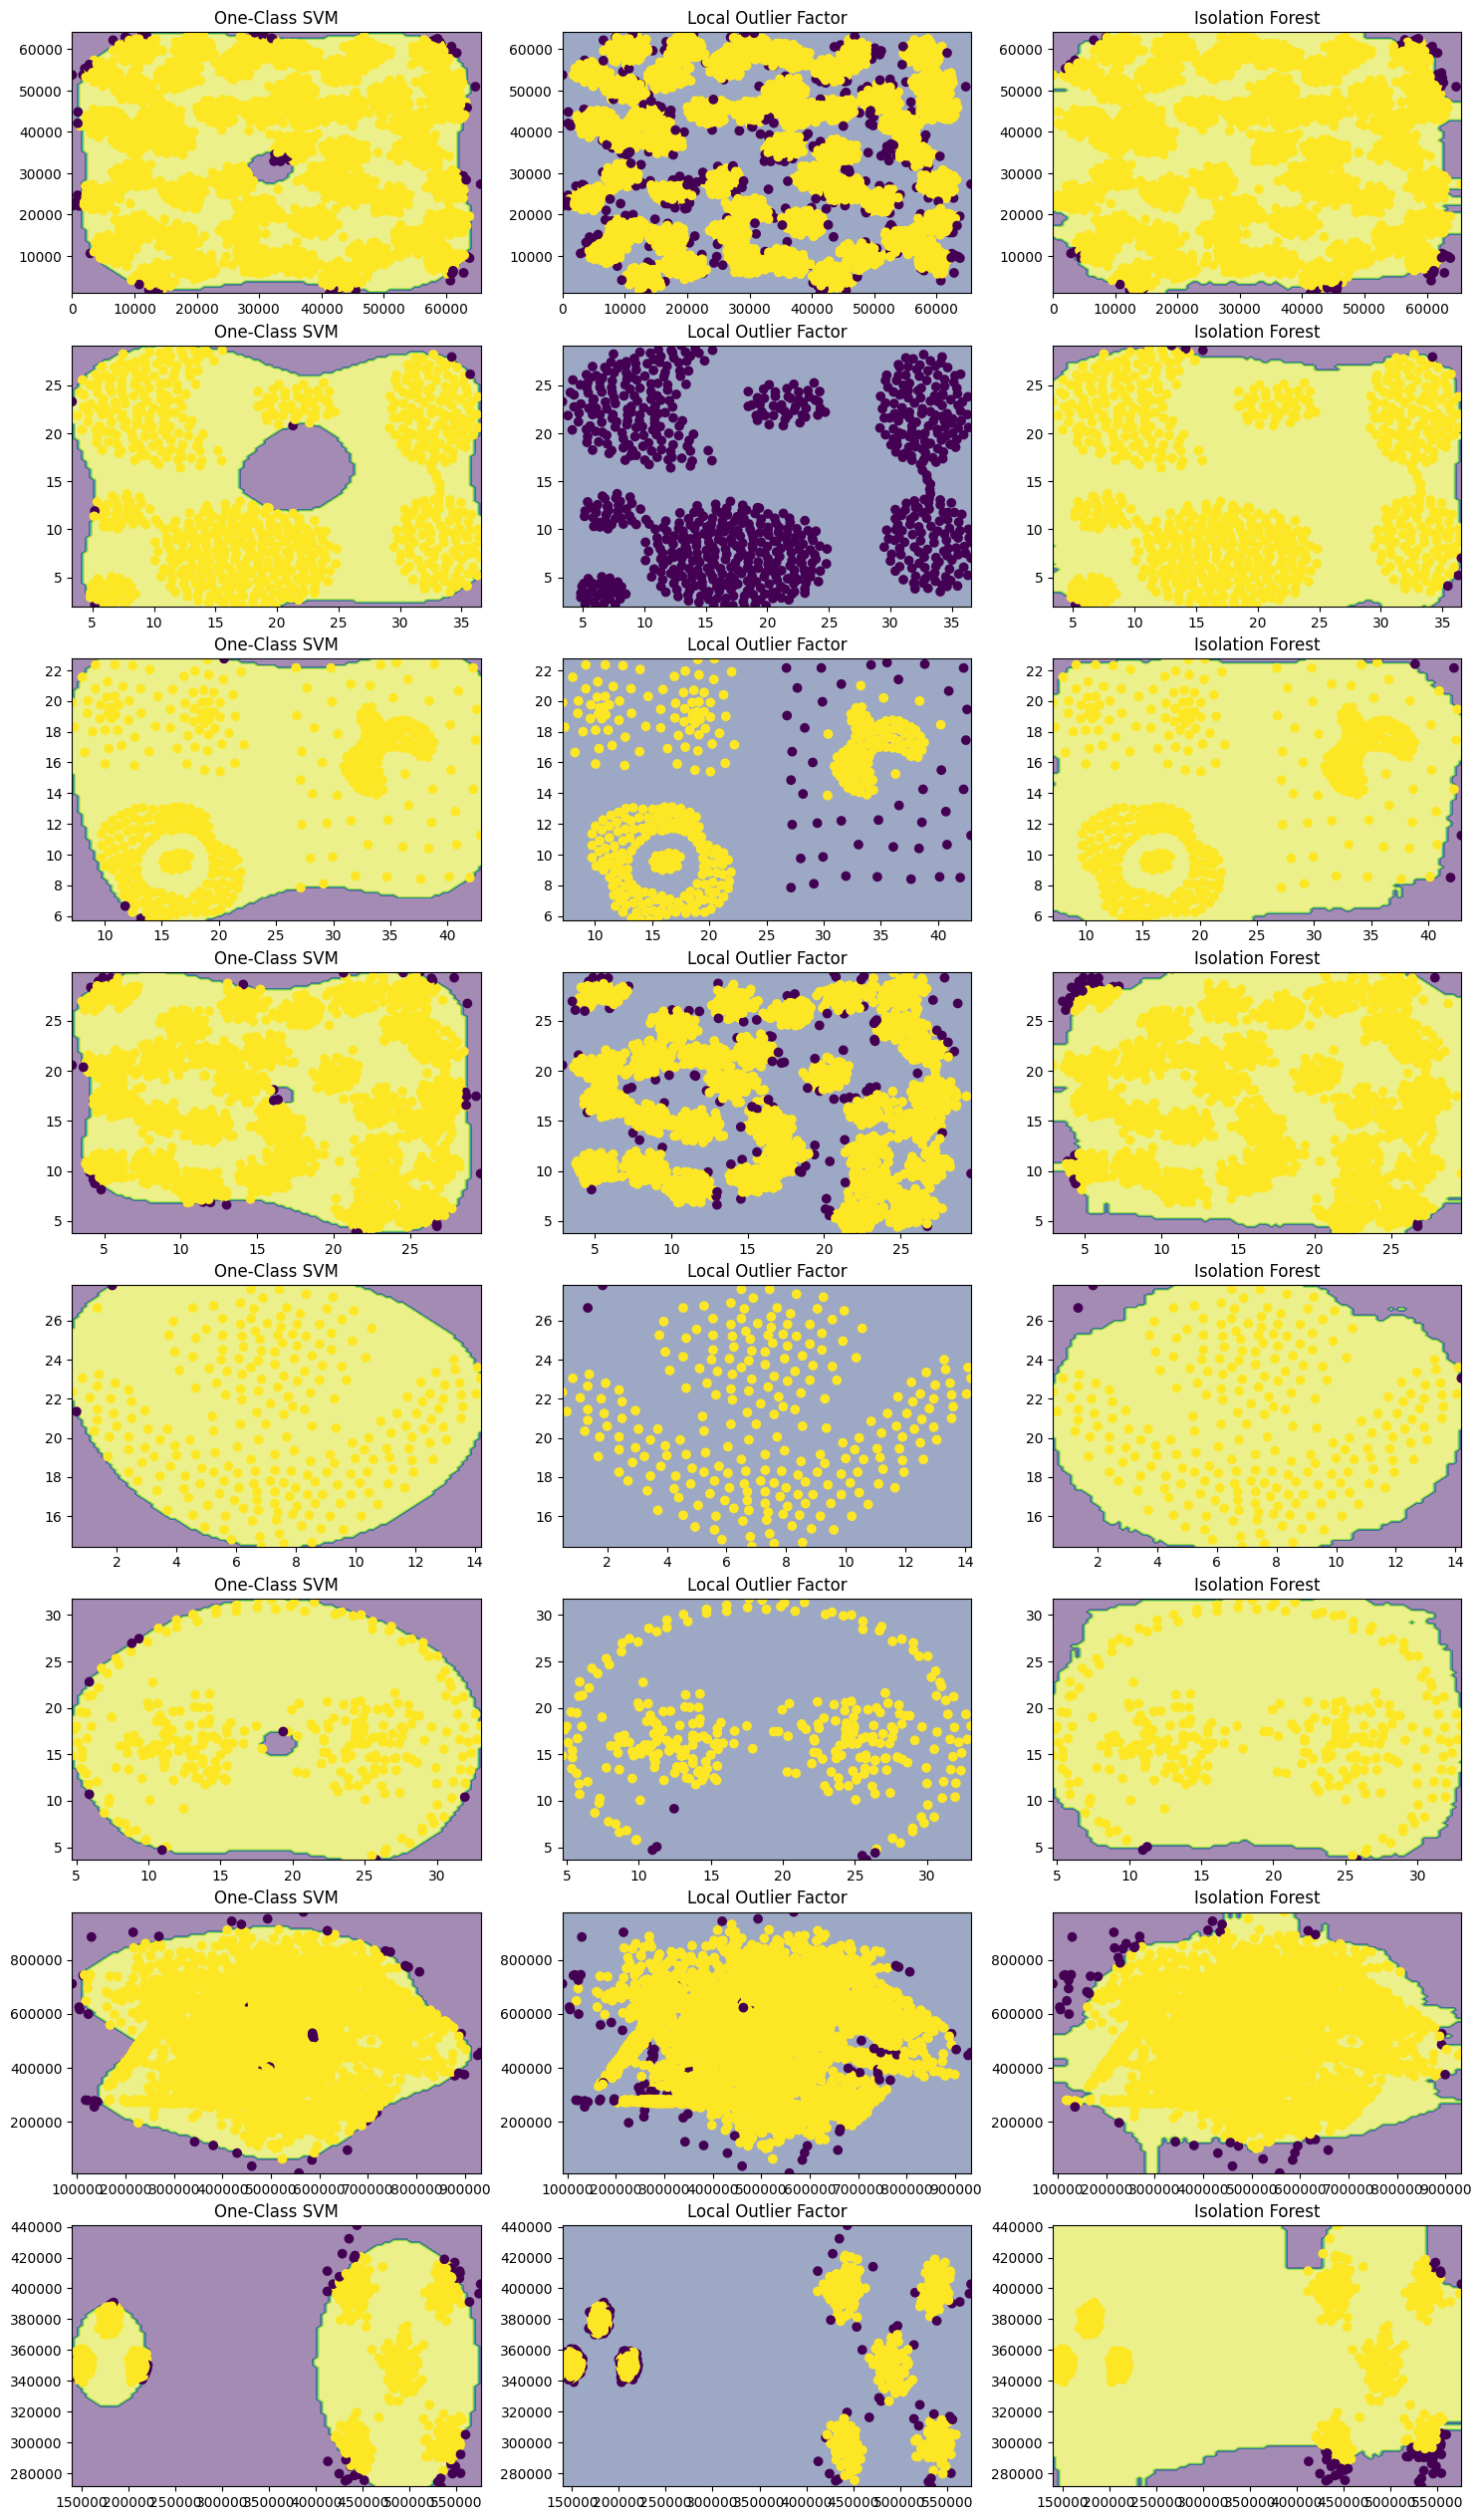

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

# Ładujemy dane
dfs = data_sets

# Definiujemy modele
ocsvm = OneClassSVM(nu=0.01)
lof = LocalOutlierFactor(n_neighbors=20)
isof = IsolationForest(contamination=0.01)

# Przygotowujemy wykresy
fig, axes = plt.subplots(nrows=len(dfs), ncols=3, figsize=(18, 4*len(dfs)))

# Dla każdego zbioru danych
for i, df in enumerate(dfs):

    # Wyznaczamy wartości odstające dla każdego z modeli
    X = df.values
    y_ocsvm = ocsvm.fit_predict(X)
    y_lof = lof.fit_predict(X)
    y_isof = isof.fit_predict(X)

    # Wyznaczamy granice decyzyjne dla każdego z modeli
    xx, yy = np.meshgrid(np.linspace(X[:,0].min(), X[:,0].max(), 100), 
                         np.linspace(X[:,1].min(), X[:,1].max(), 100))
    Z_ocsvm = ocsvm.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    Z_lof = lof.fit_predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    Z_isof = isof.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Rysujemy wykresy z wartościami odstającymi i granicami decyzyjnymi
    axes[i, 0].contourf(xx, yy, Z_ocsvm, cmap='viridis', alpha=0.5)
    axes[i, 0].scatter(X[:, 0], X[:, 1], c=y_ocsvm, cmap='viridis')
    axes[i, 0].set_title("One-Class SVM")
    axes[i, 1].contourf(xx, yy, Z_lof, cmap='viridis', alpha=0.5)
    axes[i, 1].scatter(X[:, 0], X[:, 1], c=y_lof, cmap='viridis')
    axes[i, 1].set_title("Local Outlier Factor")
    axes[i, 2].contourf(xx, yy, Z_isof, cmap='viridis', alpha=0.5)
    axes[i, 2].scatter(X[:, 0], X[:, 1], c=y_isof, cmap='viridis')
    axes[i, 2].set_title("Isolation Forest")

# Wyświetlamy wykresy
plt.show()
